In [1]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import requests
import json


In [2]:

#This call returns the monthly wind power generation data at a state and year level. 
eia_url = "https://api.eia.gov/v2/electricity/electric-power-operational-data/data?api_key=VncsPCILhy2WlSElUxu9SmixaOdqw9gZMobZ5uz9&data[]=generation&facets[fueltypeid][]=WND&frequency=annual&sort[0][column]=period&sort[0][direction]=desc&facets[sectorid][]=99"




In [3]:
# Execute "GET" request with url
response_data = requests.get(eia_url)

In [4]:
# Print "response_data" variable
print(response_data)

<Response [200]>


In [5]:
response_content = response_data.content
print(response_content)

b'{"response":{"total":951,"dateFormat":"YYYY","frequency":"annual","data":[{"period":2022,"location":"ND","stateDescription":"North Dakota","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":16249.888,"generation-units":"thousand megawatthours"},{"period":2022,"location":"TN","stateDescription":"Tennessee","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":14.865,"generation-units":"thousand megawatthours"},{"period":2022,"location":"ENC","stateDescription":"East North Central","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":47599.91854,"generation-units":"thousand megawatthours"},{"period":2022,"location":"NE","stateDescription":"Nebraska","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":12614.061,"generation-units":"thousand megawatthours"},{"period"

In [6]:
# Format data as JSON
data = response_data.json()

In [7]:
# Use json.dumps with argument indent=4 to format data
print(json.dumps(data, indent=4))


{
    "response": {
        "total": 951,
        "dateFormat": "YYYY",
        "frequency": "annual",
        "data": [
            {
                "period": 2022,
                "location": "ND",
                "stateDescription": "North Dakota",
                "sectorid": 99,
                "sectorDescription": "All Sectors",
                "fueltypeid": "WND",
                "fuelTypeDescription": "wind",
                "generation": 16249.888,
                "generation-units": "thousand megawatthours"
            },
            {
                "period": 2022,
                "location": "TN",
                "stateDescription": "Tennessee",
                "sectorid": 99,
                "sectorDescription": "All Sectors",
                "fueltypeid": "WND",
                "fuelTypeDescription": "wind",
                "generation": 14.865,
                "generation-units": "thousand megawatthours"
            },
            {
                "period": 2022,
     

In [8]:
data = data['response']['data']
df = pd.json_normalize(data)
# Display the DataFrame
df.tail(5)

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
946,2001,WA,Washington,99,All Sectors,WND,wind,NaN,thousand megawatthours
947,2001,NY,New York,99,All Sectors,WND,wind,20.539,thousand megawatthours
948,2001,WI,Wisconsin,99,All Sectors,WND,wind,72.284,thousand megawatthours
949,2001,MAT,Middle Atlantic,99,All Sectors,WND,wind,31.714,thousand megawatthours
950,2001,OR,Oregon,99,All Sectors,WND,wind,88.587,thousand megawatthours


In [9]:
data_types = df.dtypes
print(data_types)

period                   int64
location                object
stateDescription        object
sectorid                 int64
sectorDescription       object
fueltypeid              object
fuelTypeDescription     object
generation             float64
generation-units        object
dtype: object


In [35]:
df['period'] = df['period'].astype(str)

In [36]:
data_types = df.dtypes
print(data_types)

period                  object
location                object
stateDescription        object
sectorid                 int64
sectorDescription       object
fueltypeid              object
fuelTypeDescription     object
generation             float64
generation-units        object
dtype: object


In [10]:
nan_count = df.isna().sum().sum()
print("Total NaN values in the DataFrame:", nan_count)

Total NaN values in the DataFrame: 6


In [11]:
df['generation'] = df['generation'].fillna(0)
df.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2022,ND,North Dakota,99,All Sectors,WND,wind,16249.88800,thousand megawatthours
1,2022,TN,Tennessee,99,All Sectors,WND,wind,14.86500,thousand megawatthours
2,2022,ENC,East North Central,99,All Sectors,WND,wind,47599.91854,thousand megawatthours
3,2022,NE,Nebraska,99,All Sectors,WND,wind,12614.06100,thousand megawatthours
4,2022,MTN,Mountain,99,All Sectors,WND,wind,50192.70368,thousand megawatthours


In [12]:
unique_states = df['location'].unique()
print(unique_states)

['ND' 'TN' 'ENC' 'NE' 'MTN' 'HI' 'VA' 'ID' 'WV' 'OH' 'RI' 'PA' 'AZ' 'WA'
 'VT' 'NY' 'TX' 'ESC' 'NM' 'KS' 'US' 'SAT' 'OK' 'NEW' 'CO' 'IA' 'PCN' 'AK'
 'NV' 'PR' 'WSC' 'OR' 'NC' 'NH' 'WY' 'CA' 'CT' 'IL' 'UT' 'MO' 'MD' 'ME'
 'MAT' 'MT' 'MN' 90 'WNC' 'SD' 'NJ' 'DE' 'PCC' 'WI' 'MI' 'MA' 'IN']


In [13]:
unique_states = df['stateDescription'].unique()
print(unique_states)

['North Dakota' 'Tennessee' 'East North Central' 'Nebraska' 'Mountain'
 'Hawaii' 'Virginia' 'Idaho' 'West Virginia' 'Ohio' 'Rhode Island'
 'Pennsylvania' 'Arizona' 'Washington' 'Vermont' 'New York' 'Texas'
 'East South Central' 'New Mexico' 'Kansas' 'U.S. Total' 'South Atlantic'
 'Oklahoma' 'New England' 'Colorado' 'Iowa' 'Pacific Noncontiguous'
 'Alaska' 'Nevada' 'Puerto Rico' 'West South Central' 'Oregon'
 'North Carolina' 'New Hampshire' 'Wyoming' 'California' 'Connecticut'
 'Illinois' 'Utah' 'Missouri' 'Maryland' 'Maine' 'Middle Atlantic'
 'Montana' 'Minnesota' 'Pacific' 'West North Central' 'South Dakota'
 'New Jersey' 'Delaware' 'Pacific Contiguous' 'Wisconsin' 'Michigan'
 'Massachusetts' 'Indiana']


In [14]:
new_df = df[['period', 'stateDescription', 'generation']]
new_df.tail(50)

,period,stateDescription,generation
901,2002,Pacific Noncontiguous,1.614
902,2002,Wyoming,447.330
903,2002,Wisconsin,46.180
904,2002,East North Central,46.509
905,2002,Iowa,918.835
906,2002,Middle Atlantic,139.394
907,2002,Pacific Contiguous,4595.385
908,2002,Massachusetts,0.000
909,2002,West Virginia,9.023
910,2002,California,3802.645


In [15]:
stateDescription_to_remove = ['Alaska', 'U.S. Total', 'New England','West South Central', 'Pacific Noncontiguous', 'Pacific Contiguous', 'Middle Atlantic', 'East North Central',  'East South Central', 'South Atlantic', 'Hawaii' ,'Mountain','Pacific' ,'West North Central','Puerto Rico']

new_df = new_df[~new_df['stateDescription'].isin(stateDescription_to_remove)]

new_df.head(50)

,period,stateDescription,generation
0,2022,North Dakota,16249.88800
1,2022,Tennessee,14.86500
3,2022,Nebraska,12614.06100
6,2022,Virginia,50.85200
7,2022,Idaho,2441.68800
8,2022,West Virginia,2006.89500
9,2022,Ohio,3154.00700
10,2022,Rhode Island,209.33800
11,2022,Pennsylvania,3572.24500
12,2022,Arizona,1564.34800


In [16]:
transposed_df = new_df.pivot(index='stateDescription', columns='period', values='generation')
transposed_df = transposed_df.reset_index()
transposed_df.columns.name = None
transposed_df.rename(columns={'stateDescription': 'State'}, inplace = True)
transposed_df = transposed_df.round(3)


In [27]:
transposed_df.head(5)

,index,State,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,449.764,468.115,452.035,541.582,569.934,530.190,554.374,644.160,1600.319,1564.348
1,1,California,3499.738,3802.645,3895.431,4305.875,4262.229,4882.801,5584.933,5384.955,...,12822.060,12992.498,12229.559,13509.039,12822.948,14023.951,13735.069,13583.089,15177.006,14638.061
2,2,Colorado,48.640,139.006,147.109,220.141,776.234,865.536,1291.516,3220.843,...,7203.720,7368.614,7475.279,9421.204,9314.663,9745.150,10852.376,13386.228,15125.697,16911.126
3,3,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.742,12.706,12.295,12.215,12.184,12.758,12.833
4,4,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.458,5.051,5.126,5.321,4.965,5.207,5.270,5.179,4.849,4.377


In [18]:
print(transposed_df.columns)

Index(['State',    2001,    2002,    2003,    2004,    2005,    2006,    2007,
          2008,    2009,    2010,    2011,    2012,    2013,    2014,    2015,
          2016,    2017,    2018,    2019,    2020,    2021,    2022],
      dtype='object')


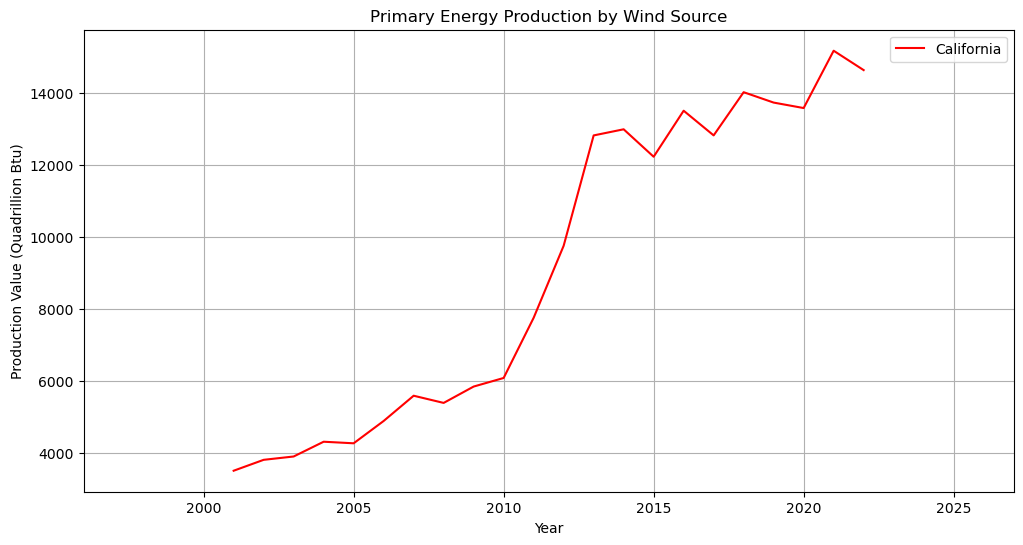

In [34]:
# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
California_row = transposed_df[(transposed_df.index == 1) & (transposed_df['State'] == 'California')]
# Arizona_row = transposed_df[(transposed_df.index == 0) & (transposed_df['State'] == 'Arizona')]

# Extract the years and values for each production type
years = California_row.columns[2:].astype(int)
California_values = California_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, California_values, linestyle='-', color='r', label='California')
plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Production Value (Quadrillion Btu)")
plt.grid(True)
plt.legend()

# Extend the x-axis by adding extra space on both ends
plt.xlim(years[0] - 5, years[-1] + 5)  # Adjust the numbers to control the extension

plt.show()



In [20]:
# Reset the index to make 'State' a column
transposed_df.reset_index(inplace=True)

# Create a new DataFrame with 'State' and '2022' columns
state_2022_df = transposed_df[['State', 2022]]

# Print the new DataFrame
state_2022_df.head()



,State,2022
0,Arizona,1564.348
1,California,14638.061
2,Colorado,16911.126
3,Connecticut,12.833
4,Delaware,4.377


In [21]:
print(state_2022_df.columns)

Index(['State', 2022], dtype='object')


In [22]:
# Iterate over column names and count characters
column_name_lengths = {str(col): len(str(col)) for col in state_2022_df.columns}

# Print the column name lengths
print(column_name_lengths)

{'State': 5, '2022': 4}


In [23]:
# state_2022_df.rename(columns={2022: '2022'}, inplace = True)

state_2022_df = state_2022_df.copy()




state_2022_df.rename(columns={2022: '2022'}, inplace=True)


In [24]:
new_rows = [
  {'State': 'South Carolina', '2022': 0},
  {'State': 'Florida', '2022': 0},
  {'State': 'Mississippi', '2022': 0},
  {'State': 'Louisiana', '2022': 0},
  {'State': 'District ofColumbia', '2022': 0},
  {'State': 'Kentucky', '2022': 0},
  {'State': 'Alabama', '2022': 0},
  {'State': 'Georgia', '2022': 0},
]

# Convert the list of dictionaries to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Concatenate the original DataFrame and the new rows DataFrame
state_2022_df = pd.concat([state_2022_df, new_rows_df], ignore_index=True)

state_2022_df.head(50)


,State,2022
0,Arizona,1564.348
1,California,14638.061
2,Colorado,16911.126
3,Connecticut,12.833
4,Delaware,4.377
5,Idaho,2441.688
6,Illinois,23493.806
7,Indiana,9985.205
8,Iowa,45761.370
9,Kansas,29687.479


In [26]:
state_2022_df = state_2022_df.sort_values(by='2022', ascending = [False])

# Display the sorted DataFrame
state_2022_df.head(10)

,State,2022
32,Texas,114786.903
8,Iowa,45761.370
26,Oklahoma,37552.755
9,Kansas,29687.479
6,Illinois,23493.806
2,Colorado,16911.126
24,North Dakota,16249.888
14,Minnesota,15091.227
1,California,14638.061
21,New Mexico,14434.551


In [28]:
print(transposed_df.columns)

Index(['index', 'State',    2001,    2002,    2003,    2004,    2005,    2006,
          2007,    2008,    2009,    2010,    2011,    2012,    2013,    2014,
          2015,    2016,    2017,    2018,    2019,    2020,    2021,    2022],
      dtype='object')


In [29]:
transposed_df.head()

,index,State,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,449.764,468.115,452.035,541.582,569.934,530.190,554.374,644.160,1600.319,1564.348
1,1,California,3499.738,3802.645,3895.431,4305.875,4262.229,4882.801,5584.933,5384.955,...,12822.060,12992.498,12229.559,13509.039,12822.948,14023.951,13735.069,13583.089,15177.006,14638.061
2,2,Colorado,48.640,139.006,147.109,220.141,776.234,865.536,1291.516,3220.843,...,7203.720,7368.614,7475.279,9421.204,9314.663,9745.150,10852.376,13386.228,15125.697,16911.126
3,3,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.742,12.706,12.295,12.215,12.184,12.758,12.833
4,4,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.458,5.051,5.126,5.321,4.965,5.207,5.270,5.179,4.849,4.377


In [32]:
for column in transposed_df.columns:
    print(column)
    transposed_df.rename(columns={column: str(column)}, inplace=True)

transposed_df.head()    

index
State
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


,index,State,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,449.764,468.115,452.035,541.582,569.934,530.190,554.374,644.160,1600.319,1564.348
1,1,California,3499.738,3802.645,3895.431,4305.875,4262.229,4882.801,5584.933,5384.955,...,12822.060,12992.498,12229.559,13509.039,12822.948,14023.951,13735.069,13583.089,15177.006,14638.061
2,2,Colorado,48.640,139.006,147.109,220.141,776.234,865.536,1291.516,3220.843,...,7203.720,7368.614,7475.279,9421.204,9314.663,9745.150,10852.376,13386.228,15125.697,16911.126
3,3,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.742,12.706,12.295,12.215,12.184,12.758,12.833
4,4,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.458,5.051,5.126,5.321,4.965,5.207,5.270,5.179,4.849,4.377


In [33]:
transposed_df['2001']

0          NaN
1     3499.738
2       48.640
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8      487.864
9       39.832
10         NaN
11         NaN
12       0.000
13       0.280
14     897.018
15         NaN
16         NaN
17       2.630
18         NaN
19         NaN
20         NaN
21         NaN
22      20.539
23         NaN
24         NaN
25         NaN
26         NaN
27      88.587
28      11.175
29         NaN
30       0.871
31       0.000
32    1187.510
33         NaN
34      12.133
35         NaN
36       0.000
37         NaN
38      72.284
39     365.159
Name: 2001, dtype: float64